In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split # to split the data
#from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm


%matplotlib inline



In [6]:
data = pd.read_excel('round2.xlsx')

In [7]:
ones = data[data['Y']==1]
zeros = data[data['Y']==0]


KeyError: 'Y'

In [33]:
data_t=data.iloc[:,1:19]


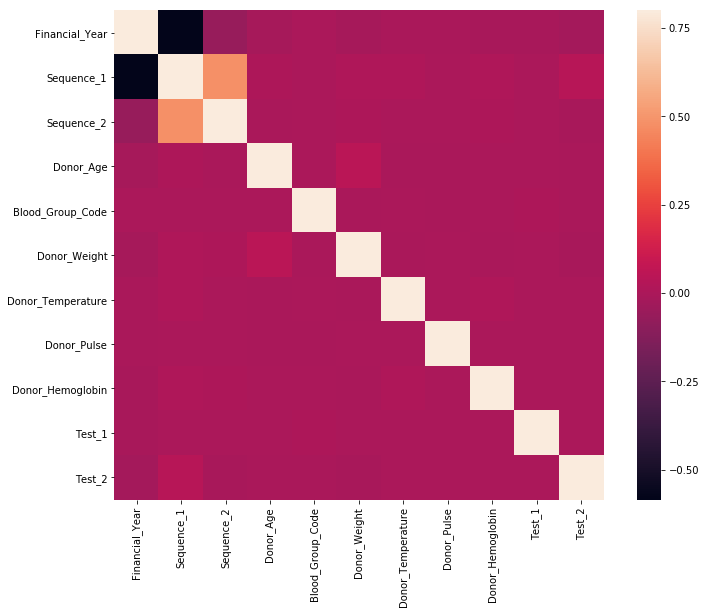

In [34]:
hmap = data_t.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(hmap,vmax=.8,square=True)

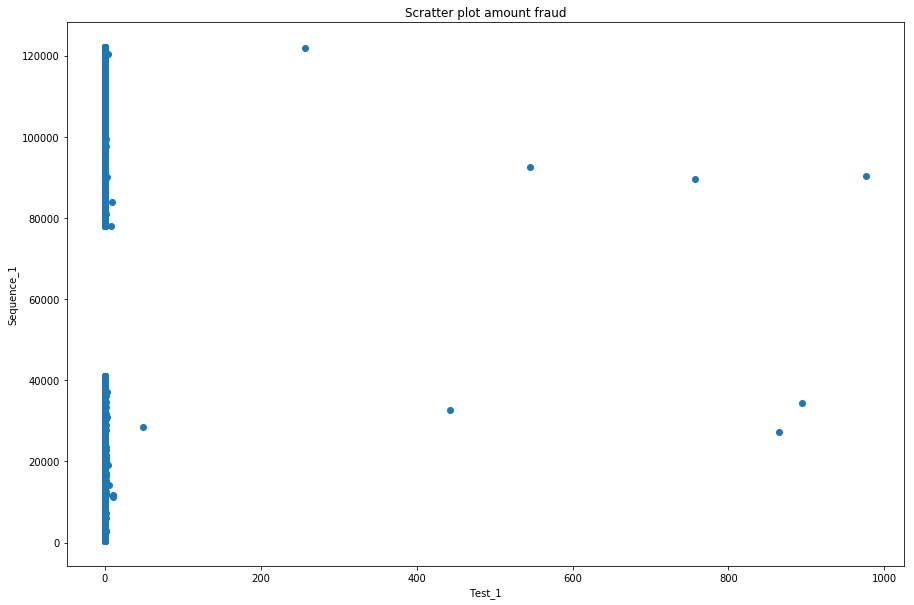

In [24]:
plt.figure(figsize=(15,10))
plt.scatter(zeros['Test_1'], zeros['Sequence_1']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Test_1')
plt.ylabel('Sequence_1')

plt.show()

In [18]:
zeros.corr()

,Row_ID,Financial_Year,Sequence_1,Sequence_2,Donor_Age,Blood_Group_Code,Donor_Weight,Donor_Temperature,Donor_Pulse,Donor_Hemoglobin,Test_1,Test_2,Y
Row_ID,1.000000,0.683834,-0.640612,-0.163540,-0.006454,-0.009294,-0.015158,-0.000809,-0.002090,-0.009401,-0.005183,-0.024503,NaN
Financial_Year,0.683834,1.000000,-0.584653,-0.062945,-0.011901,0.003339,-0.016101,-0.001287,-0.002271,-0.011164,-0.006304,-0.018709,NaN
Sequence_1,-0.640612,-0.584653,1.000000,0.483314,0.006075,0.001761,0.015321,0.014564,0.004753,0.011323,0.000938,0.039219,NaN
Sequence_2,-0.163540,-0.062945,0.483314,1.000000,-0.005778,0.004348,0.006623,0.003110,0.001763,0.008708,0.000112,-0.005678,NaN
Donor_Age,-0.006454,-0.011901,0.006075,-0.005778,1.000000,0.000652,0.048736,-0.002165,-0.000929,0.002166,-0.000070,-0.003141,NaN
Blood_Group_Code,-0.009294,0.003339,0.001761,0.004348,0.000652,1.000000,-0.006270,0.000606,-0.001621,-0.000268,0.004264,-0.000467,NaN
Donor_Weight,-0.015158,-0.016101,0.015321,0.006623,0.048736,-0.006270,1.000000,-0.002810,0.002675,-0.002451,-0.000726,-0.006550,NaN
Donor_Temperature,-0.000809,-0.001287,0.014564,0.003110,-0.002165,0.000606,-0.002810,1.000000,-0.000700,0.010281,-0.000416,0.003960,NaN
Donor_Pulse,-0.002090,-0.002271,0.004753,0.001763,-0.000929,-0.001621,0.002675,-0.000700,1.000000,-0.000162,-0.000503,0.000119,NaN
Donor_Hemoglobin,-0.009401,-0.011164,0.011323,0.008708,0.002166,-0.000268,-0.002451,0.010281,-0.000162,1.000000,-0.000262,0.002158,NaN
